In [27]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [28]:
df_auto_cot = pd.read_csv("../datasets/error_analysis/auto_gpt3_gpt3_50_50_generations_merged.csv")
df_baseline = pd.read_csv("../datasets/error_analysis/baseline_zero_shot_gpt3_50_50_merged.csv")
df_zero_shot_cot = pd.read_csv("../datasets/error_analysis/zero_shot_cot_50_50_merged.csv")





# turn from % string into decimal
def convert_percentage(percentage):
    if isinstance(percentage, str):
        return float(percentage[:percentage.find("%")]) / 100
    elif isinstance(percentage, float):
        return percentage  # It's already a float, no conversion needed
    else:
        raise ValueError("Unexpected data type in 'confidence' column")

def get_metrics(df) -> (np.ndarray, np.ndarray, np.ndarray):
    df.dropna(subset=['label', 'confidence'], inplace=True)


    # drop all rows with no % in confidence or similarity column
    df = df[df['confidence'].str.contains('%')]
    df = df[df['similarity'].str.contains('%')]
    labels = df['label'].to_numpy()

    confidences = df['confidence'].to_numpy()

    similarities = df['similarity'].to_numpy()
    # Apply the conversion function to each value in the 'confidence' column
    confidences = np.array([convert_percentage(confidence) for confidence in confidences])

    similarities = np.array([convert_percentage(similarity) for similarity in similarities])

    # flip all values in the confidences array when the label is False
    confidences = np.where(labels == False, 1 - confidences, confidences)
    
    # if True turn to 1 else 0
    labels = np.where(labels == True, 1, 0)

    return confidences, similarities, labels


In [29]:
get_metrics(df_auto_cot)

(array([0.9 , 0.8 , 0.8 , 0.8 , 0.8 , 0.5 , 0.7 , 0.8 , 0.7 , 0.7 , 0.8 ,
        0.7 , 0.8 , 0.9 , 0.9 , 0.9 , 0.7 , 0.7 , 0.9 , 0.8 , 0.8 , 0.7 ,
        0.9 , 0.9 , 0.  , 0.  , 0.2 , 0.2 , 0.2 , 0.  , 0.  , 0.  , 0.  ,
        0.1 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  ,
        0.  , 0.  , 0.  , 0.1 , 0.  , 0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.1 , 0.  , 0.  , 0.1 , 0.5 ,
        0.2 , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.2 , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.1 , 0.1 , 0.2 , 0.  , 0.2 , 0.1 , 0.  ,
        0.  , 0.  , 0.  , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.3 , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.3 , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.1 , 0.  , 0.  , 

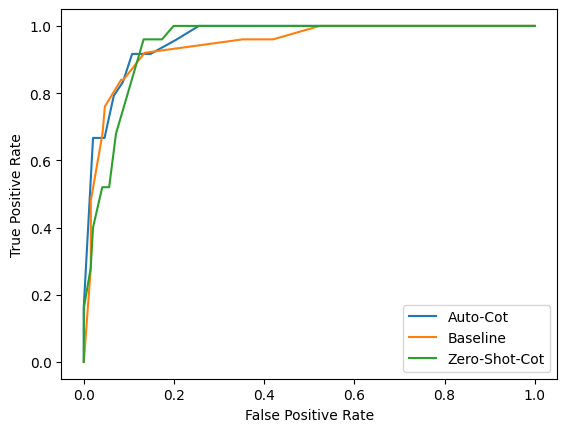

In [30]:
confidences_auto_cot, similarities_auto_cot, labels_auto_cot = get_metrics(df_auto_cot)
confidences_baseline, similarities_baseline, labels_baseline = get_metrics(df_baseline)
confidences_zero_shot_cot, similarities_zero_shot_cot, labels_zero_shot_cot = get_metrics(df_zero_shot_cot)


fpr, tpr, _ = metrics.roc_curve(labels_auto_cot,  similarities_auto_cot)
plt.plot(fpr,tpr, label="Auto-Cot")

fpr, tpr, _ = metrics.roc_curve(labels_baseline,  similarities_baseline)
plt.plot(fpr,tpr, label="Baseline")

fpr, tpr, _ = metrics.roc_curve(labels_zero_shot_cot,  similarities_zero_shot_cot)
plt.plot(fpr,tpr, label="Zero-Shot-Cot")

plt.legend(loc="lower right")
# fpr, tpr, _ = metrics.roc_curve(labels_auto_cot,  confidences_auto_cot)
# plt.plot(fpr,tpr)

# fpr, tpr, _ = metrics.roc_curve(labels_baseline,  confidences_baseline)
# plt.plot(fpr,tpr)

# fpr, tpr, _ = metrics.roc_curve(labels_zero_shot_cot,  confidences_zero_shot_cot)
# plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


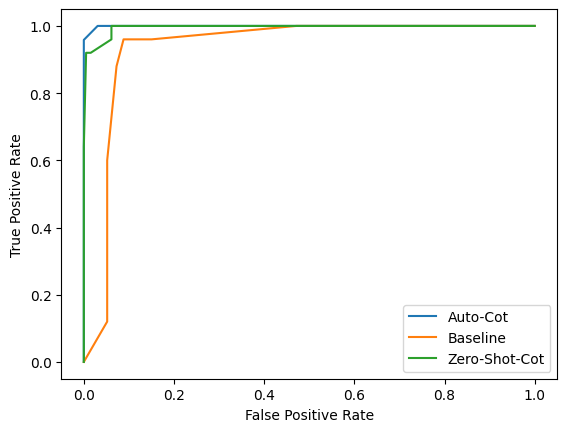

In [31]:
fpr, tpr, _ = metrics.roc_curve(labels_auto_cot,  confidences_auto_cot)
plt.plot(fpr,tpr, label="Auto-Cot")

fpr, tpr, _ = metrics.roc_curve(labels_baseline,  confidences_baseline)
plt.plot(fpr,tpr, label="Baseline")

fpr, tpr, _ = metrics.roc_curve(labels_zero_shot_cot,  confidences_zero_shot_cot)
plt.plot(fpr,tpr, label="Zero-Shot-Cot")

plt.legend(loc="lower right")
# fpr, tpr, _ = metrics.roc_curve(labels_auto_cot,  confidences_auto_cot)
# plt.plot(fpr,tpr)

# fpr, tpr, _ = metrics.roc_curve(labels_baseline,  confidences_baseline)
# plt.plot(fpr,tpr)

# fpr, tpr, _ = metrics.roc_curve(labels_zero_shot_cot,  confidences_zero_shot_cot)
# plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
